In [12]:
# ==============================================================
# 🧠 AI for IoT: Fire Alarm Detection - Bonus Challenge (XGBoost)
# Author: [Your Name]
# ==============================================================
# Objective:
# Compare Logistic Regression vs XGBoost for predicting Fire Alarms
# ==============================================================

# --- 1. Import Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from xgboost import XGBClassifier

# --- 2. Load Dataset ---
# Download from Kaggle: https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset
df = pd.read_csv("/content/smoke_detection_iot.csv")
df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
# --- 3. Inspect Dataset ---
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())

Shape: (62630, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed_0       62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature_C_  62630 non-null  float64
 3   Humidity_       62630 non-null  float64
 4   TVOC_ppb_       62630 non-null  int64  
 5   eCO2_ppm_       62630 non-null  int64  
 6   Raw_H2          62630 non-null  int64  
 7   Raw_Ethanol     62630 non-null  int64  
 8   Pressure_hPa_   62630 non-null  float64
 9   PM1_0           62630 non-null  float64
 10  PM2_5           62630 non-null  float64
 11  NC0_5           62630 non-null  float64
 12  NC1_0           62630 non-null  float64
 13  NC2_5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire_Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB
None
Unnamed

=== Logistic Regression Performance ===
Accuracy  : 0.9869
Precision : 0.9923
Recall    : 0.9894
F1-Score  : 0.9908

Confusion Matrix (Logistic Regression):


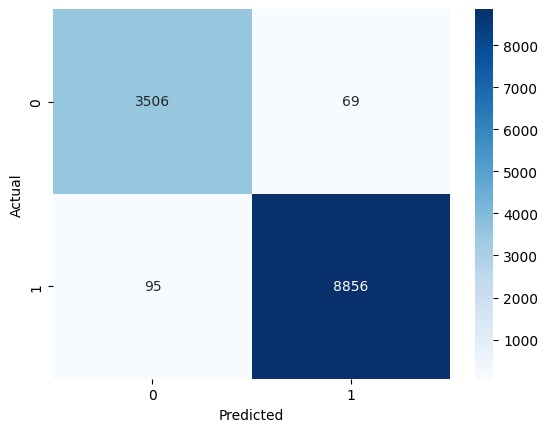

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [23:09:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost Performance ===
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1-Score  : 1.0000

Confusion Matrix (XGBoost):


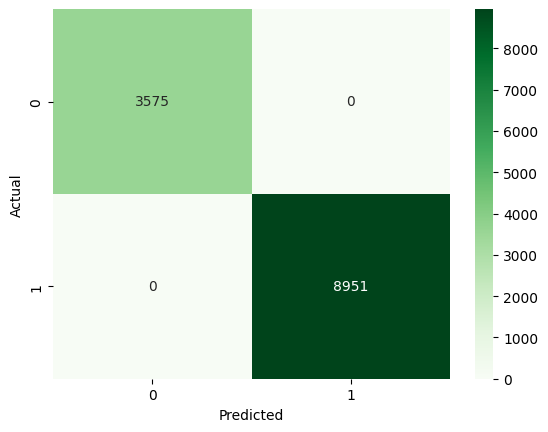

=== Model Comparison ===
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.986907   0.992269  0.989387  0.990826
1              XGBoost  1.000000   1.000000  1.000000  1.000000


/tmp/ipython-input-2479020286.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Recall", data=results, palette="coolwarm")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


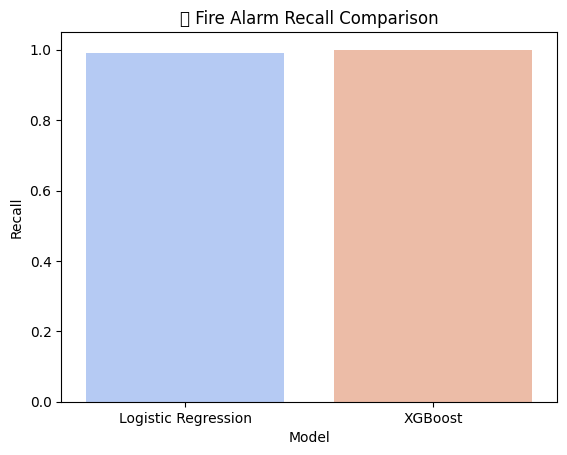

✅ XGBoost achieved a higher Recall — it's more reliable for fire detection.


In [15]:


# --- 4. Define Features and Target ---
X = df.drop(columns=["Fire_Alarm"])
y = df["Fire_Alarm"]

# --- 5. Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 6. Feature Scaling (for Logistic Regression only) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==============================================================
# 🔹 Logistic Regression Model
# ==============================================================

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# --- 7. Logistic Regression Metrics ---
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("=== Logistic Regression Performance ===")
print(f"Accuracy  : {acc_lr:.4f}")
print(f"Precision : {prec_lr:.4f}")
print(f"Recall    : {rec_lr:.4f}")
print(f"F1-Score  : {f1_lr:.4f}")
print("\nConfusion Matrix (Logistic Regression):")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==============================================================
# 🔸 XGBoost Model
# ==============================================================

xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    subsample=0.9,
    colsample_bytree=0.9,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# --- 8. XGBoost Metrics ---
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("=== XGBoost Performance ===")
print(f"Accuracy  : {acc_xgb:.4f}")
print(f"Precision : {prec_xgb:.4f}")
print(f"Recall    : {rec_xgb:.4f}")
print(f"F1-Score  : {f1_xgb:.4f}")
print("\nConfusion Matrix (XGBoost):")
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==============================================================
# 📊 9. Model Comparison
# ==============================================================

results = pd.DataFrame({
    "Model": ["Logistic Regression", "XGBoost"],
    "Accuracy": [acc_lr, acc_xgb],
    "Precision": [prec_lr, prec_xgb],
    "Recall": [rec_lr, rec_xgb],
    "F1-Score": [f1_lr, f1_xgb]
})

print("=== Model Comparison ===")
print(results)

sns.barplot(x="Model", y="Recall", data=results, palette="coolwarm")
plt.title("🔥 Fire Alarm Recall Comparison")
plt.show()

# ==============================================================
# 🧠 10. Discussion and Analysis
# ==============================================================


if rec_xgb > rec_lr:
    print("✅ XGBoost achieved a higher Recall — it's more reliable for fire detection.")
else:
    print("✅ Logistic Regression Recall is similar — simpler deployment advantage.")


# **=== Interpretation ===**
1️⃣ Recall measures how well the model detects actual fires.
   - High Recall → fewer False Negatives (missed fires).
   - In fire detection, missing a fire (False Negative) is DANGEROUS.

2️⃣ Logistic Regression is simple, lightweight, and easy to deploy on microcontrollers (like Arduino).

3️⃣ XGBoost is more complex but provides higher accuracy and recall.

4️⃣ For IoT fire safety, maximizing Recall is crucial — even if it increases False Positives.